# Chapter 6 - Other Popular Machine Learning Models Models
## Segment 3 - Instance-based learning w/ k-Nearest Neighbor


## Backgrund 
- supervised training alogo
- have some input with labels and make predictions 
    - eg. know car's 'mpg', 'disp', 'hp', 'wt' and some label of 'am'
    - train the model with the labeled data and predict cars' am for new data 
- KNN Assumptions:
    - dataset little noise
    - dataset labeled
    - dataset only contains relevant features
    - dataset has distinguishable subgroup 
    - not very large training set

In [4]:


import numpy as np
import pandas as pd
import scipy
import urllib
import sklearn

import matplotlib.pyplot as plt
from pylab import rcParams

from sklearn import neighbors
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
np.set_printoptions(precision=4, suppress=True) 
%matplotlib inline
rcParams['figure.figsize'] = 7, 4
plt.style.use('seaborn-whitegrid')

In [7]:
pwd


'/Users/zhengyichen/Desktop/Ex_Files_Python_Data_Science_EssT_Pt2/Exercise Files/06_03_begin'

## Importing your data

In [8]:
address = '/Users/zhengyichen/Desktop/Ex_Files_Python_Data_Science_EssT_Pt2/Exercise Files/Data/mtcars.csv'

cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

X_prime = cars[['mpg', 'disp', 'hp', 'wt']].values
y = cars.iloc[:,9].values

In [10]:
X = preprocessing.scale(X_prime)

In [11]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=.2, random_state=17)

## Building and training your model with training data

In [12]:
clf = neighbors.KNeighborsClassifier() #clf stands for classifier 
clf.fit(X_train, y_train)
print(clf)

KNeighborsClassifier()


## Evaluating your model's predictions

In [16]:
y_pred= clf.predict(X_test)
y_expect = y_test

print(metrics.classification_report(y_expect, y_pred))
print(metrics.accuracy_score(y_expect, y_pred))
#print(clf.score())

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.67      0.80         3

    accuracy                           0.86         7
   macro avg       0.90      0.83      0.84         7
weighted avg       0.89      0.86      0.85         7

0.8571428571428571


### Explanation
- recall: a measurement of model's completeness
    - of points labeled 1, 67% returned were relevant
    - of the entire dataset, 83% returned were relevant
- high precision and low recall: 
    - few result returned
    - but many of the returneds are correct

In [14]:
print(y_test.shape)

(7,)


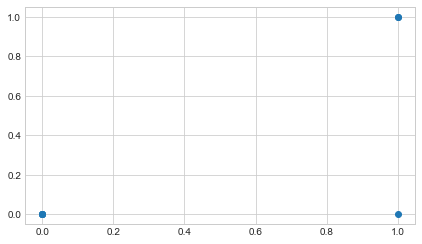

In [15]:
plt.scatter(y_expect, y_pred)